<div style="color:grey;
           font-family:Times New Roman;
           letter-spacing:1.5px">
    <h1 id="heading">Introduction</h1>
Exploring classic texts like the King James Bible and Meditations, by Marcus Aurelius, made available through the Gutenberg Project, presents an exciting opportunity. As someone fascinated by religious and historical literature, I'm keen to delve into these works using text mining techniques. Through simple analyses such as word count and sentiment analysis, we'll uncover insights into these texts. I'm particularly interested in discovering the sentiment of the books, especially trying to identify which of the bibles books have overall most intense positive or negative sentiment. Join me as we navigate through the pages of these timeless classics, shedding light on their hidden depths.</div>

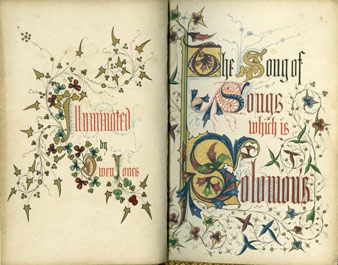

<hr>

<div style="color:grey;
           font-family:Times New Roman;
           letter-spacing:1.5px">
    <h1 id="heading">Objectives</h1>
    <ul>
        <li>Segment Texts: Divide the King James Bible into its separate books to examine sentiments within each book individually.</li>
        <li>Analyze Word Frequencies: Investigate the most common words in the King James Bible and Meditations, by Marcus Aurelius.</li>
        <li>Conduct Sentiment Analysis: Explore the emotional tone of both texts through sentiment analysis to identify positive and negative sentiment words.</li>
        <li>Compare Emotional Intensity: Calculate net sentiment scores for each book in the King James Bible to compare emotional intensity across different biblical texts.</li>
    </ul>
</div>


<div style="color:grey;
           font-family:Times New Roman;
           letter-spacing:1.5px">
    <h1 id="heading">Setting the environment</h1>
</div>

In [1]:
#SETTING THE ENVIRONMENT'
library(tidyverse) 
library(tm)
library(wordcloud)
library(dplyr)
library(ggplot2)
library(stringr)
library(tidytext)
library(reshape2)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


The following object is masked from ‘package:httr’:

    content


Loading required package: RColorBrewer


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




<div style="color:grey;
           font-family:Times New Roman;
           letter-spacing:1.5px">
    <h1 id="heading">Reading the books</h1>In the initial phase, we import the book files into our notebook. Upon inspection, we observe that they include not only the main text essential for our analysis but also additional text such as project descriptions, headnotes, and footnotes. In the subsequent steps, we'll concentrate on cleansing the text and extracting the relevant sections we require.
    </div>

In [2]:
#READING THE BOOKS
the_king_james_bible <- readLines("/kaggle/input/religious-and-philosophical-texts/pg10.txt")
meditations_by_marcus_aurelius <- readLines("/kaggle/input/religious-and-philosophical-texts/pg2680.txt")


<div style="color:grey;
           font-family:Times New Roman;
           letter-spacing:1.5px">
    <h1 id="heading">Removing extra text</h1>
     Once we get the files, we can gain a better understanding of their structure. Each file typically contains a header and a footer. Numerous religious and philosophical texts worldwide exhibit complex compositions, often encompassing multiple verses or books. Understanding the files structure allows us to identify patterns for removing headers and footers, retaining only the core text. Subsequently, we must search for patterns within each text to effectively split verses and books, so we can investigate even deeper.
</div>


<div style="color:grey;
           font-family:Times New Roman;
           letter-spacing:1.5px">
    <h2 id="heading">The King James Bible</h2>
    <h3 id="heading">Removing header and footer</h3>
Straing with the King James Bible. By manuall examinations, we searched for patterns to identify the begining and an end of each text, excluding the header and footer. For the King James Bible we can use following string: </div>

In [3]:
# Identify the index of the line containing "*** START OF THIS PROJECT GUTENBERG EBOOK THE KING JAMES BIBLE ***"
start_index <- grep("\\*\\*\\* START OF THIS PROJECT GUTENBERG EBOOK THE KING JAMES BIBLE \\*\\*\\*", the_king_james_bible)

# Identify the index of the line containing "*** END OF THIS PROJECT GUTENBERG EBOOK THE KING JAMES BIBLE ***"
end_index <- grep("\\*\\*\\* END OF THIS PROJECT GUTENBERG EBOOK THE KING JAMES BIBLE \\*\\*\\*", the_king_james_bible)

# Extract the plain book text (excluding header and footer notes)
body_the_king_james_bible <- the_king_james_bible[(start_index+16):(end_index-6)] #indexes were corected accordingly after checking the text (to remove all empty lines)

<div style="color:grey;
           font-family:Times New Roman;
           letter-spacing:1.5px">
    <h3 id="heading">Splitting into separate books</h3>
The King James Bible consists of a total of 66 books. 
I have manually opened the file and examened its contents. I established the pattern we'll use to identify the titles of each book. We'll use the pattern of four empty lines preceding each title of a book as our separator.</div>

In [4]:
#TITLES OF KING JAMES BIBLE
#define an empty line pattern
empty_line_pattern <- "^\\s*$"
# Initialize a vector to store the indices of titles
title_indices <- c()

# Loop through the text to find the titles
for (i in 1:(length(body_the_king_james_bible) - 4)) {
  # Check if the next four lines are empty
  if (grepl(empty_line_pattern, body_the_king_james_bible[i]) &&
      grepl(empty_line_pattern, body_the_king_james_bible[i + 1]) &&
      grepl(empty_line_pattern, body_the_king_james_bible[i + 2]) &&
      grepl(empty_line_pattern, body_the_king_james_bible[i + 3]) &&
      !grepl(empty_line_pattern, body_the_king_james_bible[i + 4])) {
    # If the fifth line is not empty, store its index as a title
    title_indices <- c(title_indices, i + 4)
  }
}

# Extract the titles
titles <- body_the_king_james_bible[title_indices]
# Print the titles
cat(titles, sep = "\n")
length(titles)

The First Book of Moses:  Called Genesis
The Second Book of Moses:  Called Exodus
The Third Book of Moses:  Called Leviticus
The Fourth Book of Moses:  Called Numbers
The Fifth Book of Moses:  Called Deuteronomy
The Book of Joshua
The Book of Judges
The Book of Ruth
The First Book of Samuel
The Second Book of Samuel
The First Book of the Kings
The Second Book of the Kings
The First Book of the Chronicles
The Second Book of the Chronicles
Ezra
The Book of Nehemiah
The Book of Esther
The Book of Job
The Book of Psalms
The Proverbs
Ecclesiastes
The Song of Solomon
The Book of the Prophet Isaiah
The Book of the Prophet Jeremiah
The Lamentations of Jeremiah
The Book of the Prophet Ezekiel
The Book of Daniel
Hosea
Joel
Amos
Obadiah
Jonah
Micah
Nahum
Habakkuk
Zephaniah
Haggai
Zechariah
Malachi
The New Testament of the King James Bible
The Gospel According to Saint Matthew
The Gospel According to Saint Mark
The Gospel According to Saint Luke
The Gospel According to Saint John
The Acts of the A

[1] 67

<div style="color:grey;
           font-family:Times New Roman;
           letter-spacing:1.5px">
We have extracted 67 title. We know, that our version of The King James Bible had only 66 titles. By checking it out, we see that "The New Testament of the King James Bible" is also here, which is not exactly the books title. In this case, we can just leave it out. And lets print out one of the books, so we can enjoy reading it. :)

In [5]:
#ADDING TEXT TO BOOK TITLES
# Read the text file into a character vector
text <- body_the_king_james_bible
# Initialize a list to store text for each book
books <- list()

# Iterate through each pair of title indices
for (i in 1:(length(title_indices) - 1)) {
  # Extract text between current pair of indices
  book_text <- text[(title_indices[i]):(title_indices[i + 1] - 1)]
 # Store text in the list
  books[[i]] <- book_text
}

# Extract text after the last title index (last book)
last_book_text <- text[(title_indices[length(title_indices)] ):length(text)]
# Store text of the last book in the list
books[[length(title_indices)]] <- last_book_text
cat(books[[22]][], sep="\n")

The Song of Solomon


1:1 The song of songs, which is Solomon's.

1:2 Let him kiss me with the kisses of his mouth: for thy love is
better than wine.

1:3 Because of the savour of thy good ointments thy name is as
ointment poured forth, therefore do the virgins love thee.

1:4 Draw me, we will run after thee: the king hath brought me into his
chambers: we will be glad and rejoice in thee, we will remember thy
love more than wine: the upright love thee.

1:5 I am black, but comely, O ye daughters of Jerusalem, as the tents
of Kedar, as the curtains of Solomon.

1:6 Look not upon me, because I am black, because the sun hath looked
upon me: my mother's children were angry with me; they made me the
keeper of the vineyards; but mine own vineyard have I not kept.

1:7 Tell me, O thou whom my soul loveth, where thou feedest, where
thou makest thy flock to rest at noon: for why should I be as one that
turneth aside by the flocks of thy companions?  1:8 If thou know not,
O thou fairest among wo

<div style="color:grey;
           font-family:Times New Roman;
           letter-spacing:1.5px">
    <h2 id="heading">Meditations, by Marcus Aurelius</h2>
     <h3 id="heading">Removing the header and footer</h3>
    Continuing with the meditations, by Marcus Aurelius. 

In [6]:
start_index_MA <- grep("MARCUS AURELIUS ANTONINUS THE ROMAN EMPEROR", meditations_by_marcus_aurelius)
end_index_MA <- grep("CORRESPONDENCE OF M. AURELIUS ANTONINUS AND M. CORNELIUS FRONTO'", meditations_by_marcus_aurelius)
# Extract the plain book text (excluding header and footer notes)
body_meditations_by_marcus_aurelius <- meditations_by_marcus_aurelius[(start_index_MA+1):(end_index_MA-3)] #indexes were corected accordingly after checking the text (to remove all empty lines)

<div style="color:grey;
           font-family:Times New Roman;
           letter-spacing:1.5px">
     <h3 id="heading">Splitting it into separated books</h3>
    We identified the pattern in this book, as 4 empty lines precedes the each (sub)title in the book. We will use it as our separator, to split them into separate parts. We will also print all 12 subtitles the book Meditations, by Marcus Aurelius has. 

In [7]:
# Define an empty line pattern
empty_line_pattern_MA <- "^\\s*$"

# Initialize a vector to store the indices of titles
title_indices_MA <- c()

# Loop through the text to find the titles
for (i in 1:(length(body_meditations_by_marcus_aurelius) - 4)) {
  # Check if the next four lines are empty
  if (grepl(empty_line_pattern_MA, body_meditations_by_marcus_aurelius[i]) &&
      grepl(empty_line_pattern_MA, body_meditations_by_marcus_aurelius[i + 1]) &&
      grepl(empty_line_pattern_MA, body_meditations_by_marcus_aurelius[i + 2]) &&
      grepl(empty_line_pattern_MA, body_meditations_by_marcus_aurelius[i + 3]) &&
      !grepl(empty_line_pattern_MA, body_meditations_by_marcus_aurelius[i + 4])) {
    # If the fifth line is not empty, store its index as a title
    title_indices_MA<- c(title_indices_MA, i + 4)
  }
}

# Extract the titles
titles_MA <- body_meditations_by_marcus_aurelius[title_indices_MA]
# Print the titles
cat(titles_MA, sep = "\n")

HIS FIRST BOOK
THE SECOND BOOK
THE THIRD BOOK
THE FOURTH BOOK
THE FIFTH BOOK
THE SIXTH BOOK
THE SEVENTH BOOK
THE EIGHTH BOOK
THE NINTH BOOK
THE TENTH BOOK
THE ELEVENTH BOOK
THE TWELFTH BOOK


<div style="color:grey;
           font-family:Times New Roman;
           letter-spacing:1.5px">
    <h1 id="heading">Most common words</h1>
    Lets start our research by counting the words in both books. We will present the results in a chart.
    <h2 id="heading">Word Cloud for The King James Bible</h2>
        Now, we can prepare our data to present the most common words in both books. Firstly, we will show it for the complete books (no splitted into separate (sub)books). We will use Word Cloud and also a bar chart for most common 20 words. 

In [8]:
#WORD CLOUD PLOT
book_title <- "the king james bible"
book_text <- body_the_king_james_bible[-title_indices]
# Preprocessing: Convert to lowercase, remove punctuation, remove numbers
processed_text <- tolower(book_text)
processed_text <- gsub("[[:punct:]]", " ", processed_text)
processed_text <- gsub("\\b\\d+\\b", " ", processed_text)
# Create a corpus
corpus <- Corpus(VectorSource(processed_text))
# Remove stopwords
removing_some_words <- c("thou", "thee", "thy", "hath", "hast", "saith", "shalt", "thine")
corpus <- tm_map(corpus, removeWords,c( removing_some_words,stopwords("english"), stopwords("SMART")))

word_count <- colSums(as.matrix(DocumentTermMatrix(corpus)))
# Generate a palette of colors from grey to green
color_palette <- colorRampPalette(c("grey", "green", "red"))

#BAR CHART
# Select the top 20 most common words and their frequencies
top_20_words <- sort(word_count, decreasing = TRUE)[1:20]
# Create a data frame for the top 20 words
top_20_df <- data.frame(word = names(top_20_words), count = top_20_words)
# Create the ggplot bar chart
barplot_bible_top20<-ggplot(top_20_df, aes(x = reorder(word, -count), y = count, fill = count)) +
  geom_bar(stat = "identity") +
  scale_fill_gradient(low = "grey", high = "forestgreen") +
  labs(title = "Top 20 Most Common Words in bible", x = "Words", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Warning message in tm_map.SimpleCorpus(corpus, removeWords, c(removing_some_words, :
“transformation drops documents”


<div style="color:grey;
           font-family:Times New Roman;
           letter-spacing:1.5px">
    <h2 id="heading">Word Cloud for The Meditations, by Marcus Aurelius</h2>

In [13]:
#WORD CLOUD
book_title_MA <- "Meditations by MArcus Aurelius"
book_text_MA <- body_meditations_by_marcus_aurelius[-title_indices_MA]

# Preprocessing: Convert to lowercase, remove punctuation, remove numbers
processed_text_MA <- tolower(book_text_MA)
processed_text_MA <- gsub("[[:punct:]]", " ", processed_text_MA)
processed_text_MA <- gsub("\\b\\d+\\b", " ", processed_text_MA)

# Create a corpus
corpus_MA <- Corpus(VectorSource(book_text_MA))
# Remove stopwords
remove_words<-c("thou", "thy", "thee", "doth", "shalt")
corpus_MA <- tm_map(corpus_MA, removeWords,c(stopwords("english"), stopwords("SMART"),remove_words))
# Calculate word count
word_count_MA <- colSums(as.matrix(DocumentTermMatrix(corpus_MA)))

# Select the top 20 most common words and their frequencies
top_20_words <- sort(word_count_MA, decreasing = TRUE)[1:20]
# Create a data frame for the top 10 words
top_20_df <- data.frame(word = names(top_20_words), Count = top_20_words)

# Create the ggplot bar chart
barplot_meditations_top20<-ggplot(top_20_df, aes(x = reorder(word, -Count), y = Count, fill = Count)) +
  geom_bar(stat = "identity") +
  scale_fill_gradient(low = "grey", high = "forestgreen") +
  labs(title = "Top 20 Most Common Words in meditations, by Marcus Aurelius", x = "Words", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Warning message in tm_map.SimpleCorpus(corpus_MA, removeWords, c(stopwords("english"), :
“transformation drops documents”


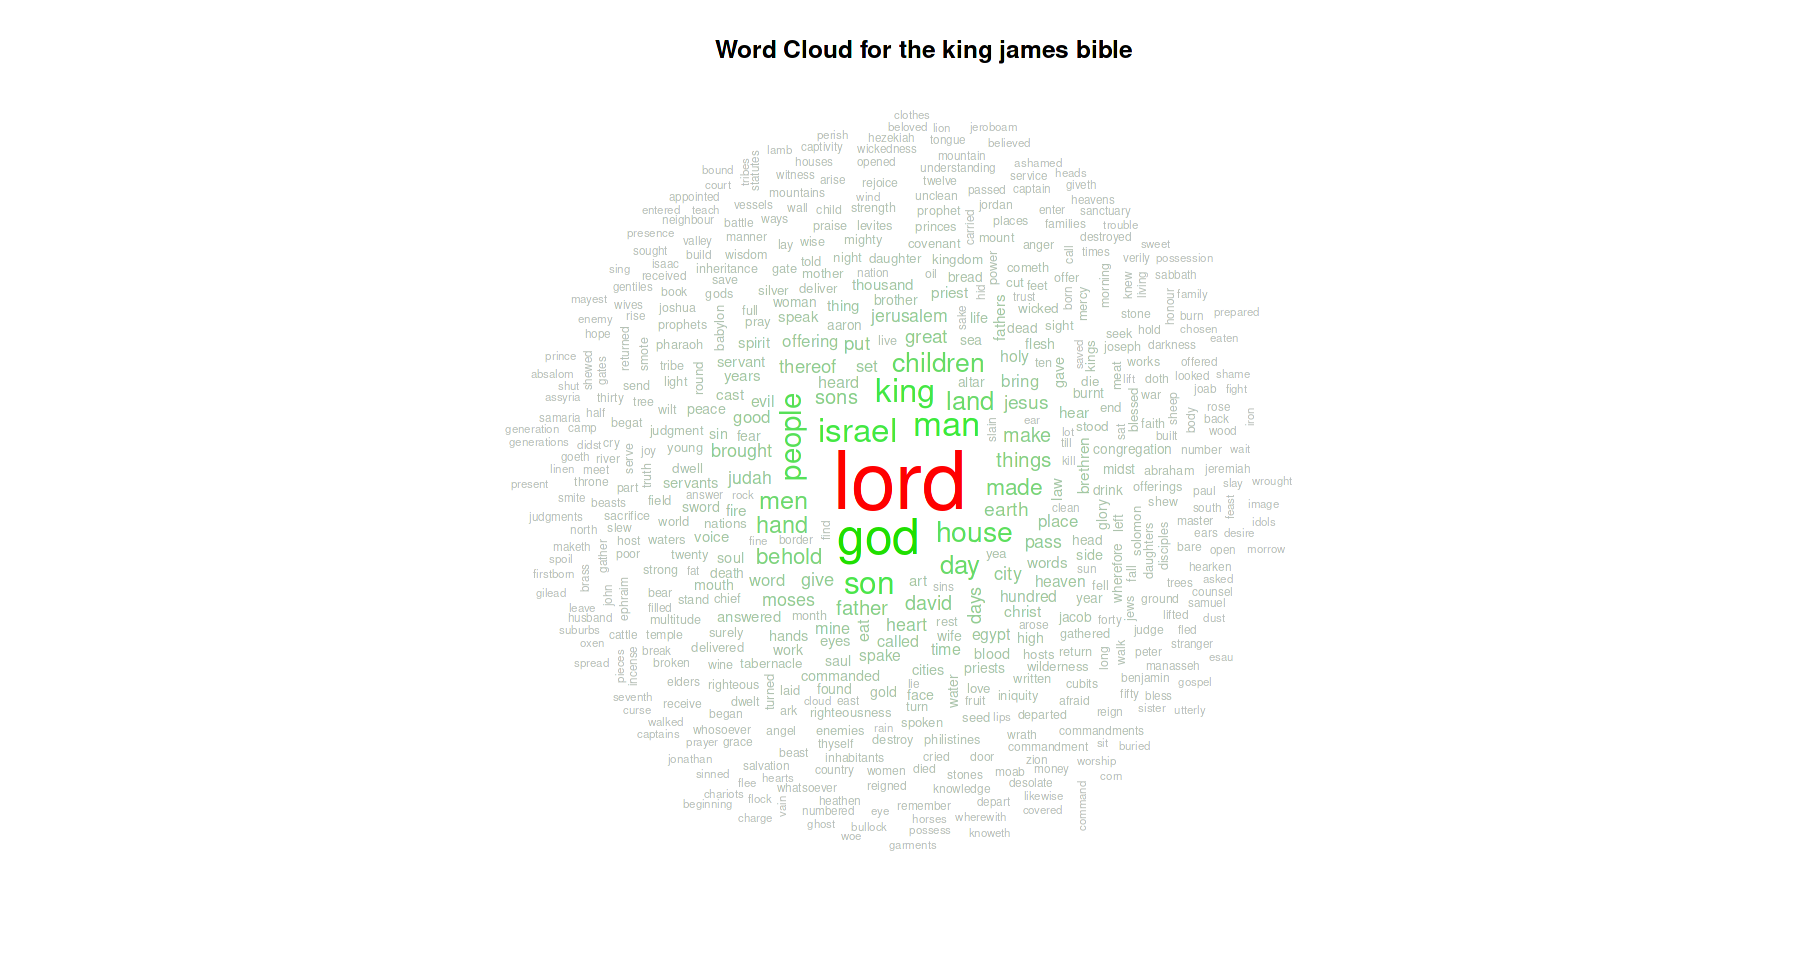

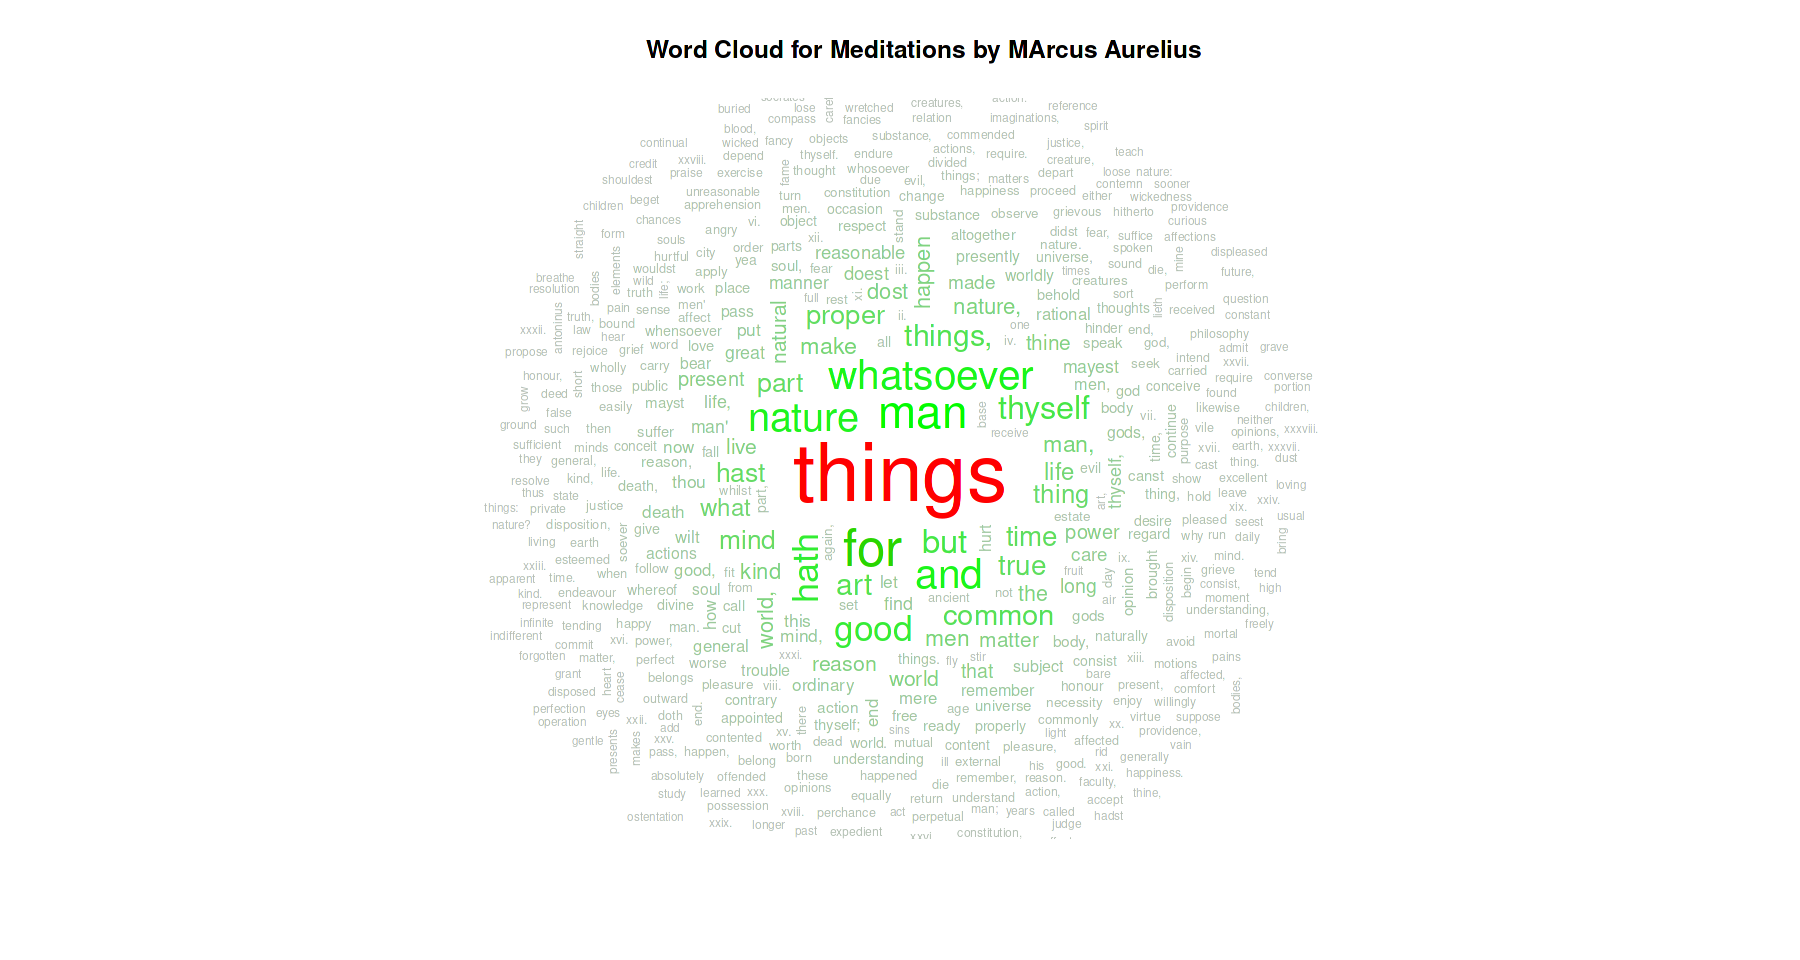

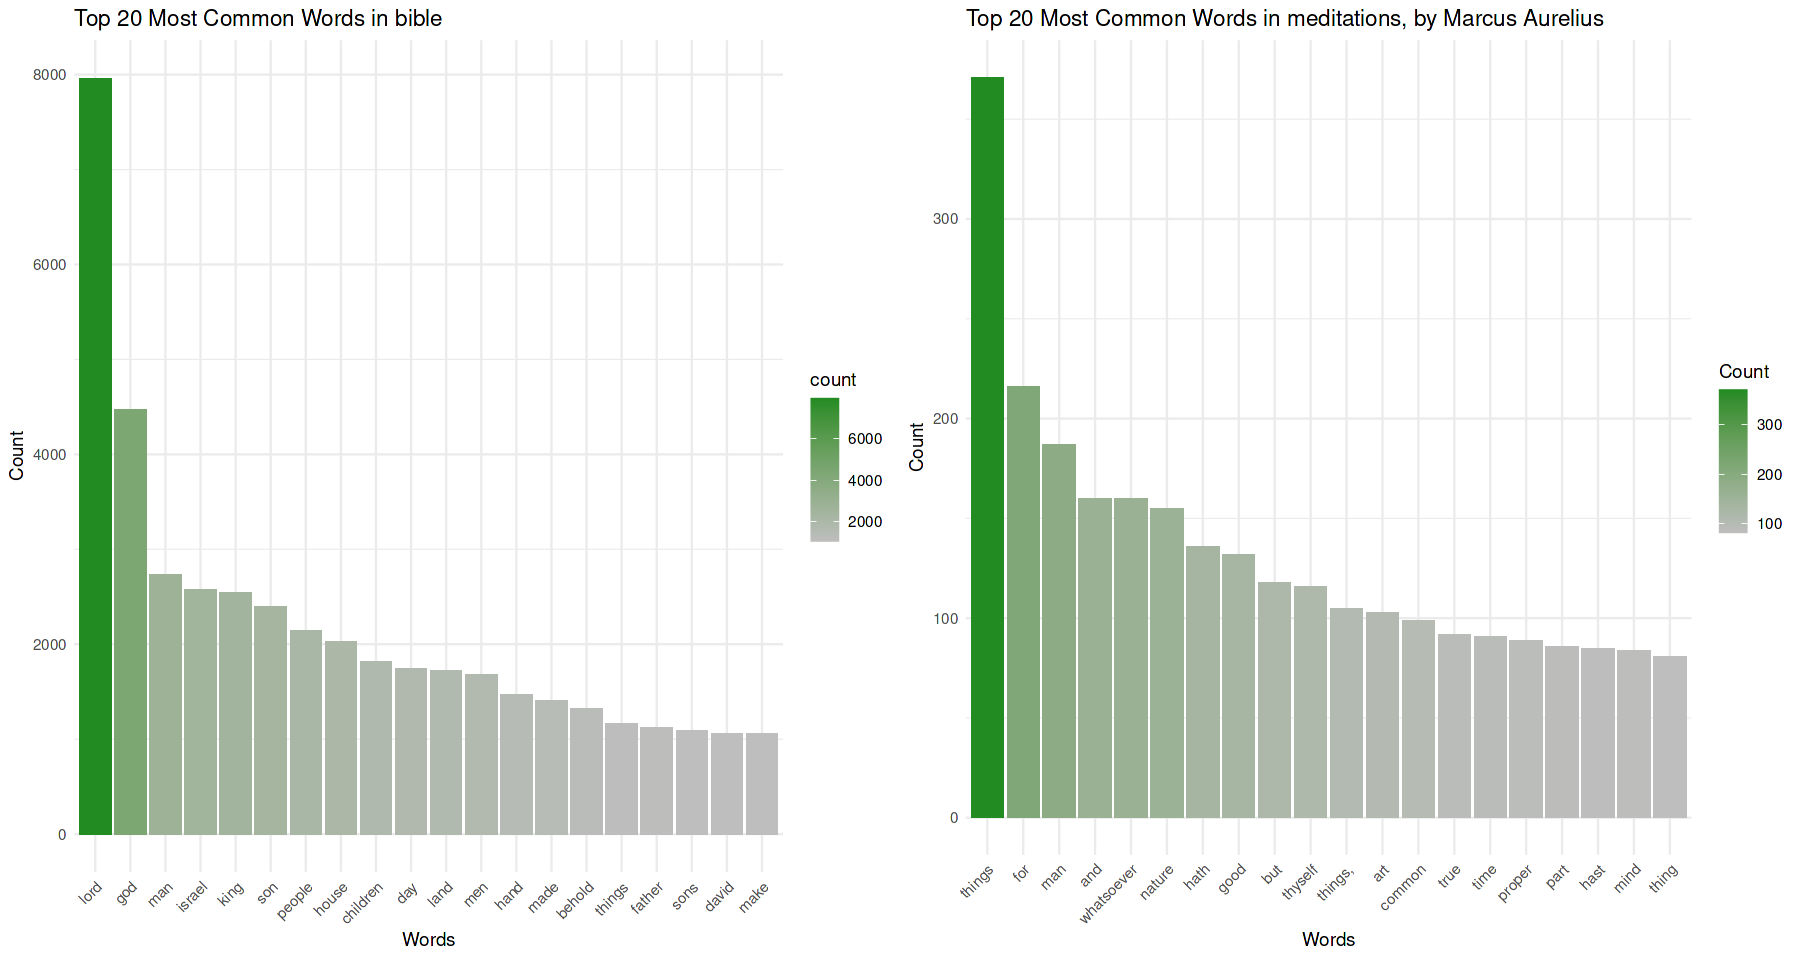

In [14]:
#setting the image size
options(repr.plot.width=15, repr.plot.height=8)
#printing teh plots
wordcloud(words = names(word_count), freq = word_count, max.words = 500, random.order = FALSE, colors = color_palette(length(word_count)))
title(paste("Word Cloud for", book_title))
wordcloud(words = names(word_count_MA), freq = word_count_MA, max.words = 500, random.order = FALSE, colors = color_palette(length(word_count_MA)))
title(paste("Word Cloud for", book_title_MA))
grid.arrange(barplot_bible_top20, barplot_meditations_top20, ncol=2)

<div style="color:grey;
           font-family:Times New Roman;
           letter-spacing:1.5px">
        Our books differ in the count of the most common words that appear in the text. The Bibles most used word is LORD, while meditations, by Marcus Aurelius uses THING most of the time. 
    The meaning of the word Lord (God) in a Christian Science by Merraim-Webster dictionary is as follows: the incorporeal divine Principle ruling over all as eternal Spirit : infinite Mind.
    Whereas, the word THINGS, by the same dictionary, defines as: 

<div style="color:grey;
           font-family:Times New Roman;
           letter-spacing:1.5px">
    <h1 id="heading">Sentiment analysis for meditations, by Marcus Aurelius</h1>
We will pull sentiment from Bing lexicon. And plot 20  most common words in Meditations, by Marcus Aurelius. The words will be displayed by sentiment; positive versus negative.
From the bellow charts, we can see that positive words are more common than negative. The most positive word in the meditations, is "good", and it appears in total 188 times, while the most frequent negative word, death, appears 65 times. 
The occurrence for negative sentiment is multiplied by -1. This is only to plot negative sentiment in a way to be best compared to positive sentiment. So the smaller the number in negative sentiment words, the greater the word occurrence is.


Joining with `by = join_by(word)`


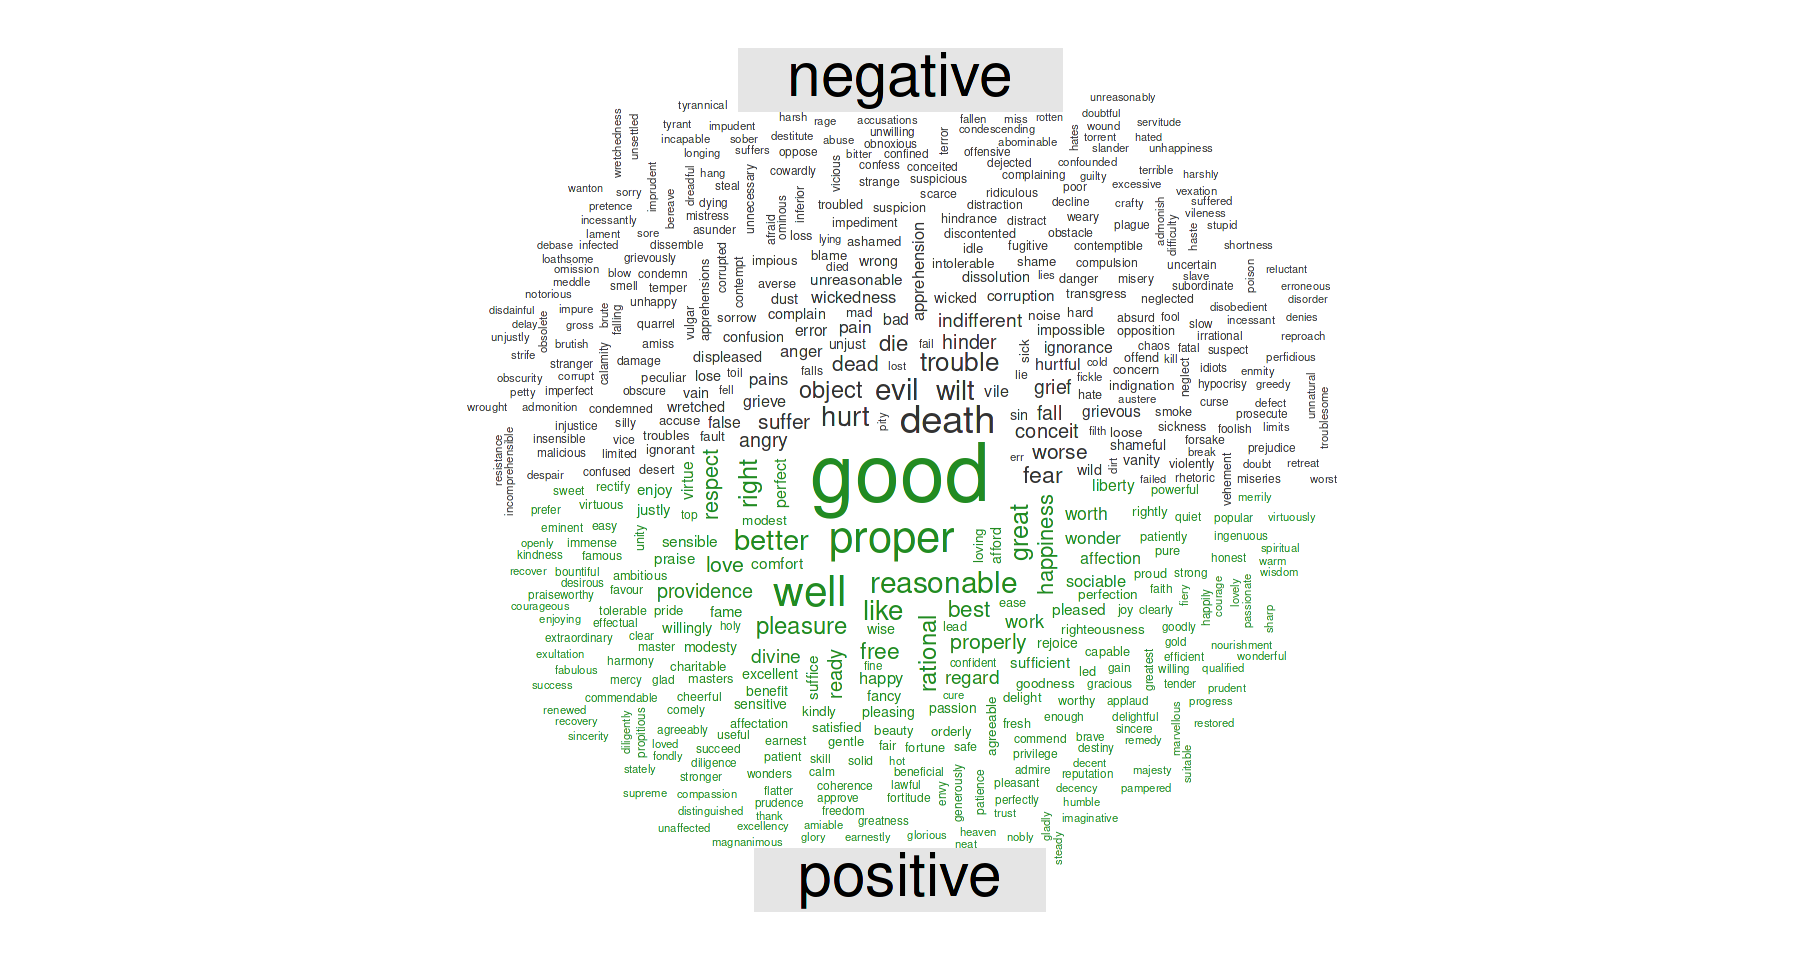

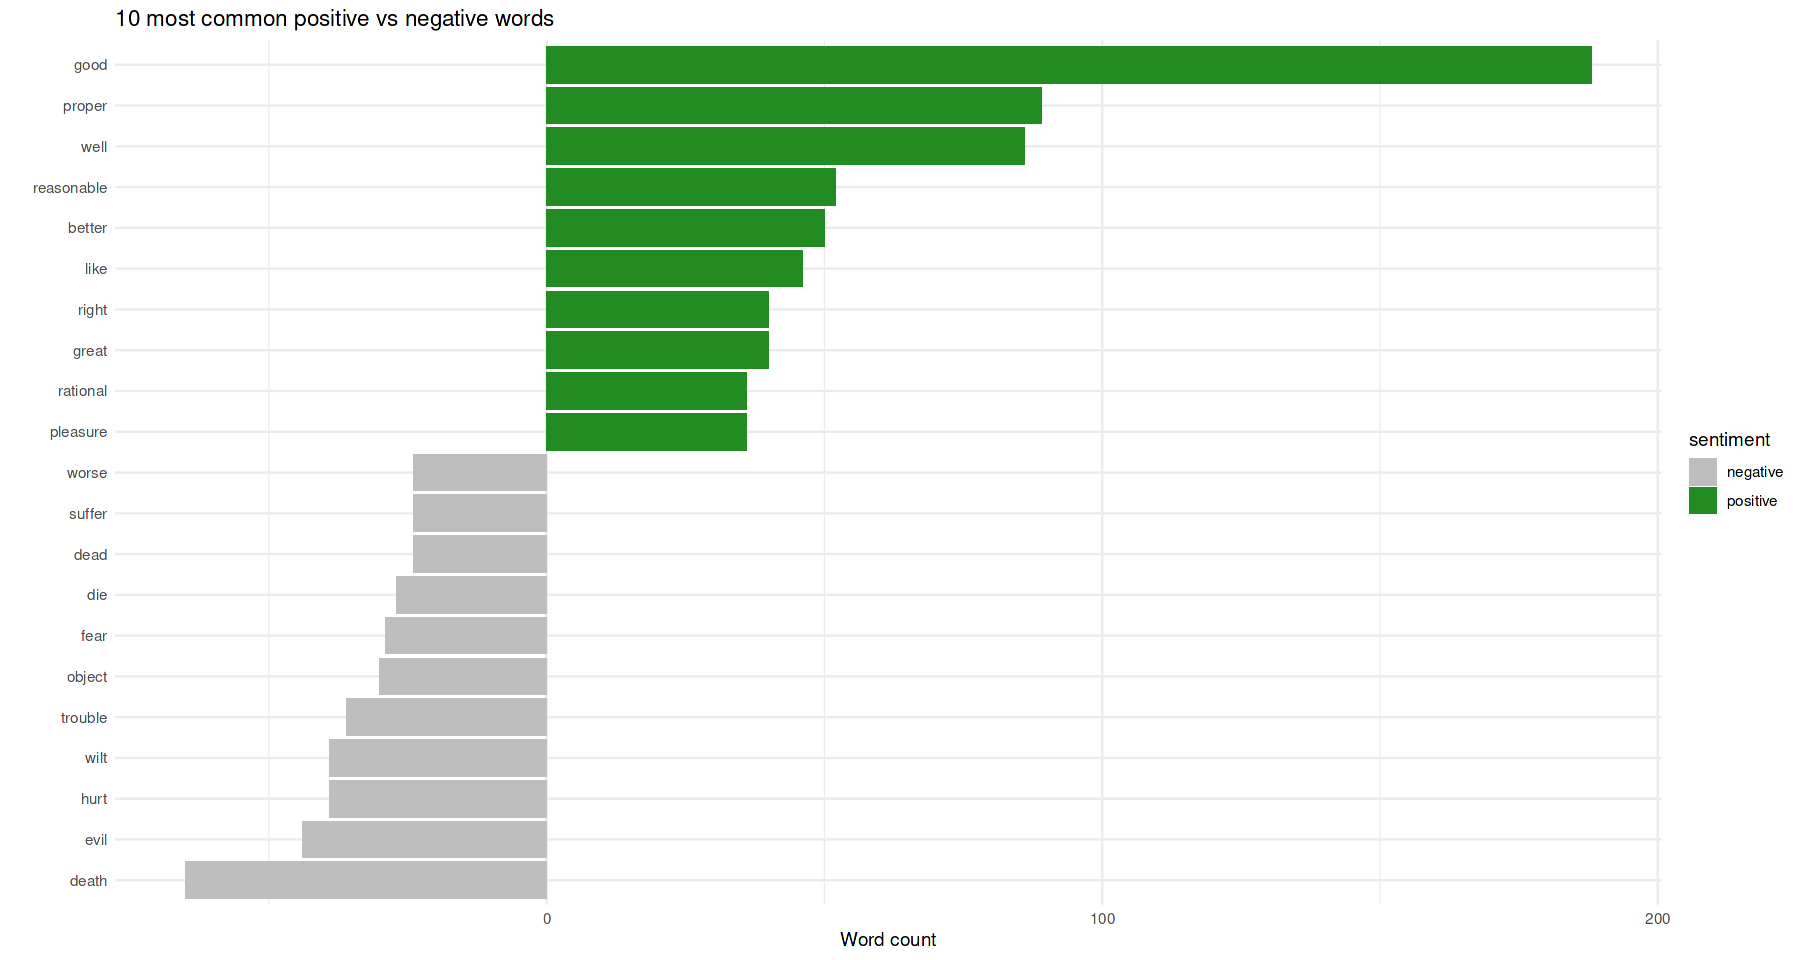

In [15]:
tidy_book_MA <- as_tibble(body_meditations_by_marcus_aurelius) %>%
  mutate(linenumber = row_number()) %>%
  ungroup()%>%
  unnest_tokens(word, value) %>%
  count(word, sort = TRUE) %>%
  inner_join(get_sentiments("bing"))

tidy_book_MA %>% 
  acast(word ~ sentiment, value.var = "n", fill =0) %>%
  comparison.cloud(colors = c("grey20", "forestgreen"),
                   max.words = 500)

options(repr.plot.width=15, repr.plot.height=8)
tidy_book_MA %>% 
  group_by(sentiment) %>%
  slice_max(n, n = 10) %>%
  ungroup() %>% mutate(n = ifelse(sentiment == "negative", -1 * n, n)) %>%
  ggplot(aes(reorder(word,n), y = n, fill=sentiment))+geom_bar(stat="identity")+ coord_flip()+
  scale_fill_manual(values=c(positive="forestgreen", negative="grey")) +
  ylab("Word count")+
  xlab("")+
  labs(title="10 most common positive vs negative words")+theme_minimal()



<div style="color:grey;
           font-family:Times New Roman;
           letter-spacing:1.5px">
We can say that on average the Meditations, by Marcus Aurelius, is a positive book. The most common positive word appears almost 3 times more than the most negative word. 

<div style="color:grey;
           font-family:Times New Roman;
           letter-spacing:1.5px">
    <h2 id="heading">Sentiment analysis for The Bible</h2>
Below, we will count the positive and negative words in The Bible, and plot them in a word cloud and bar chart. 

Joining with `by = join_by(word)`


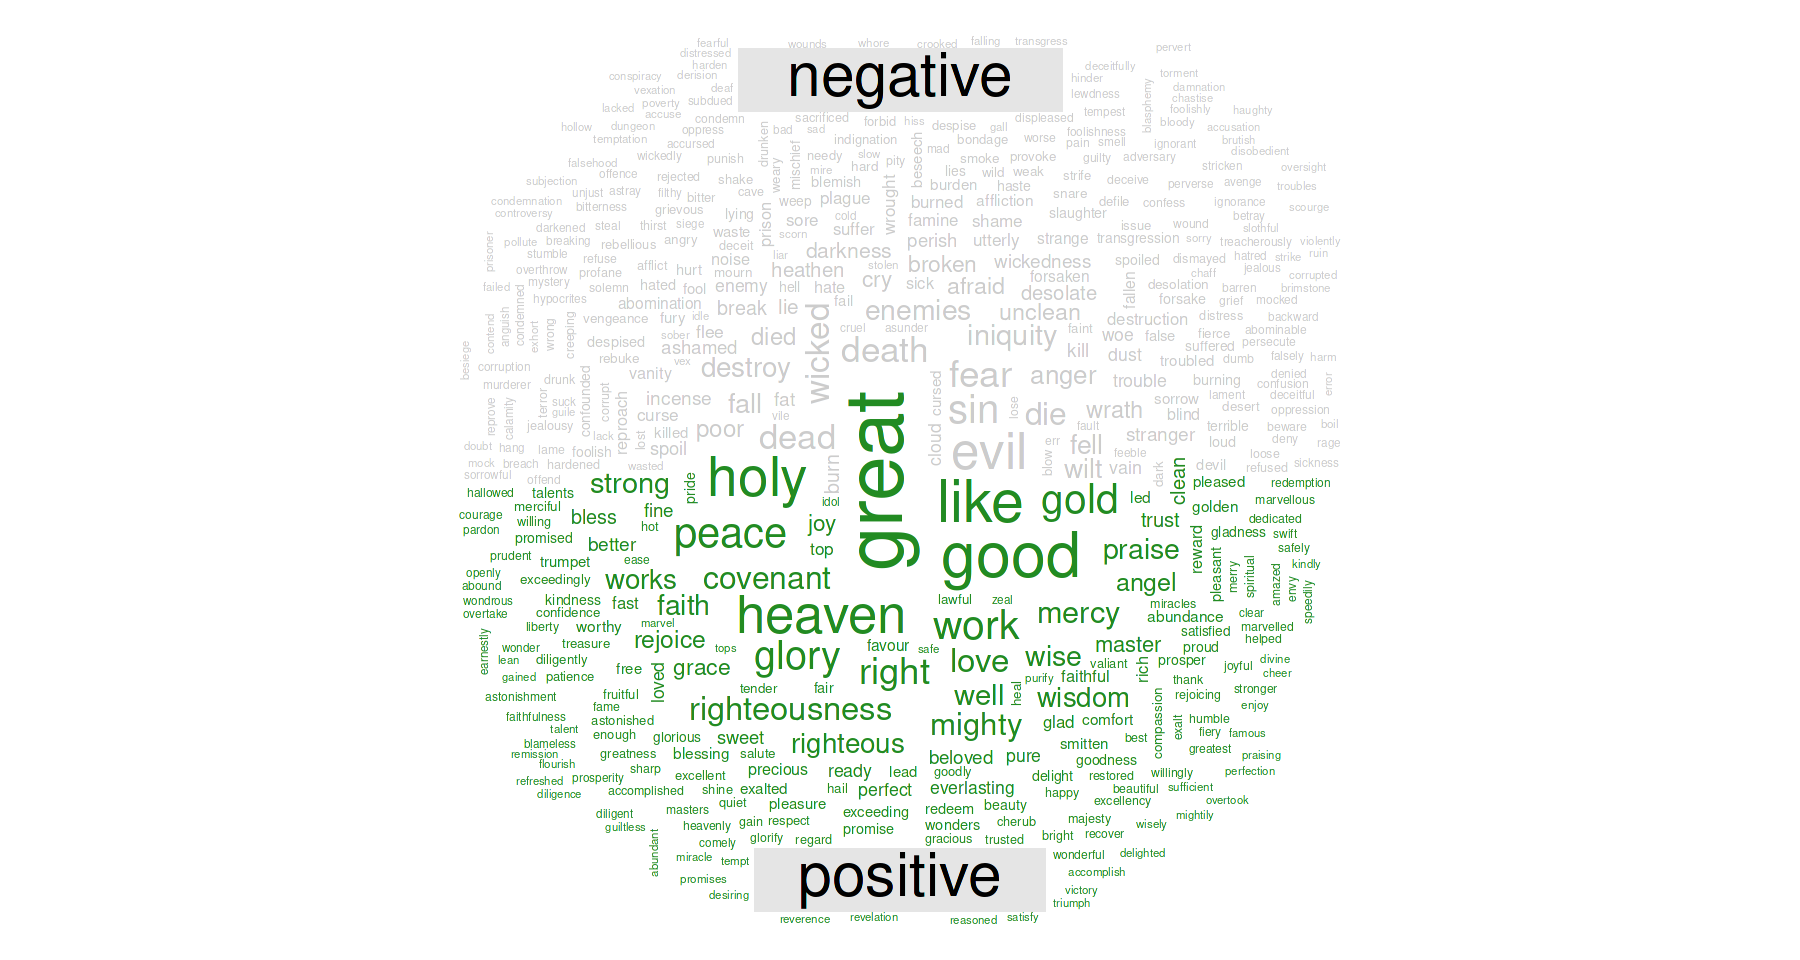

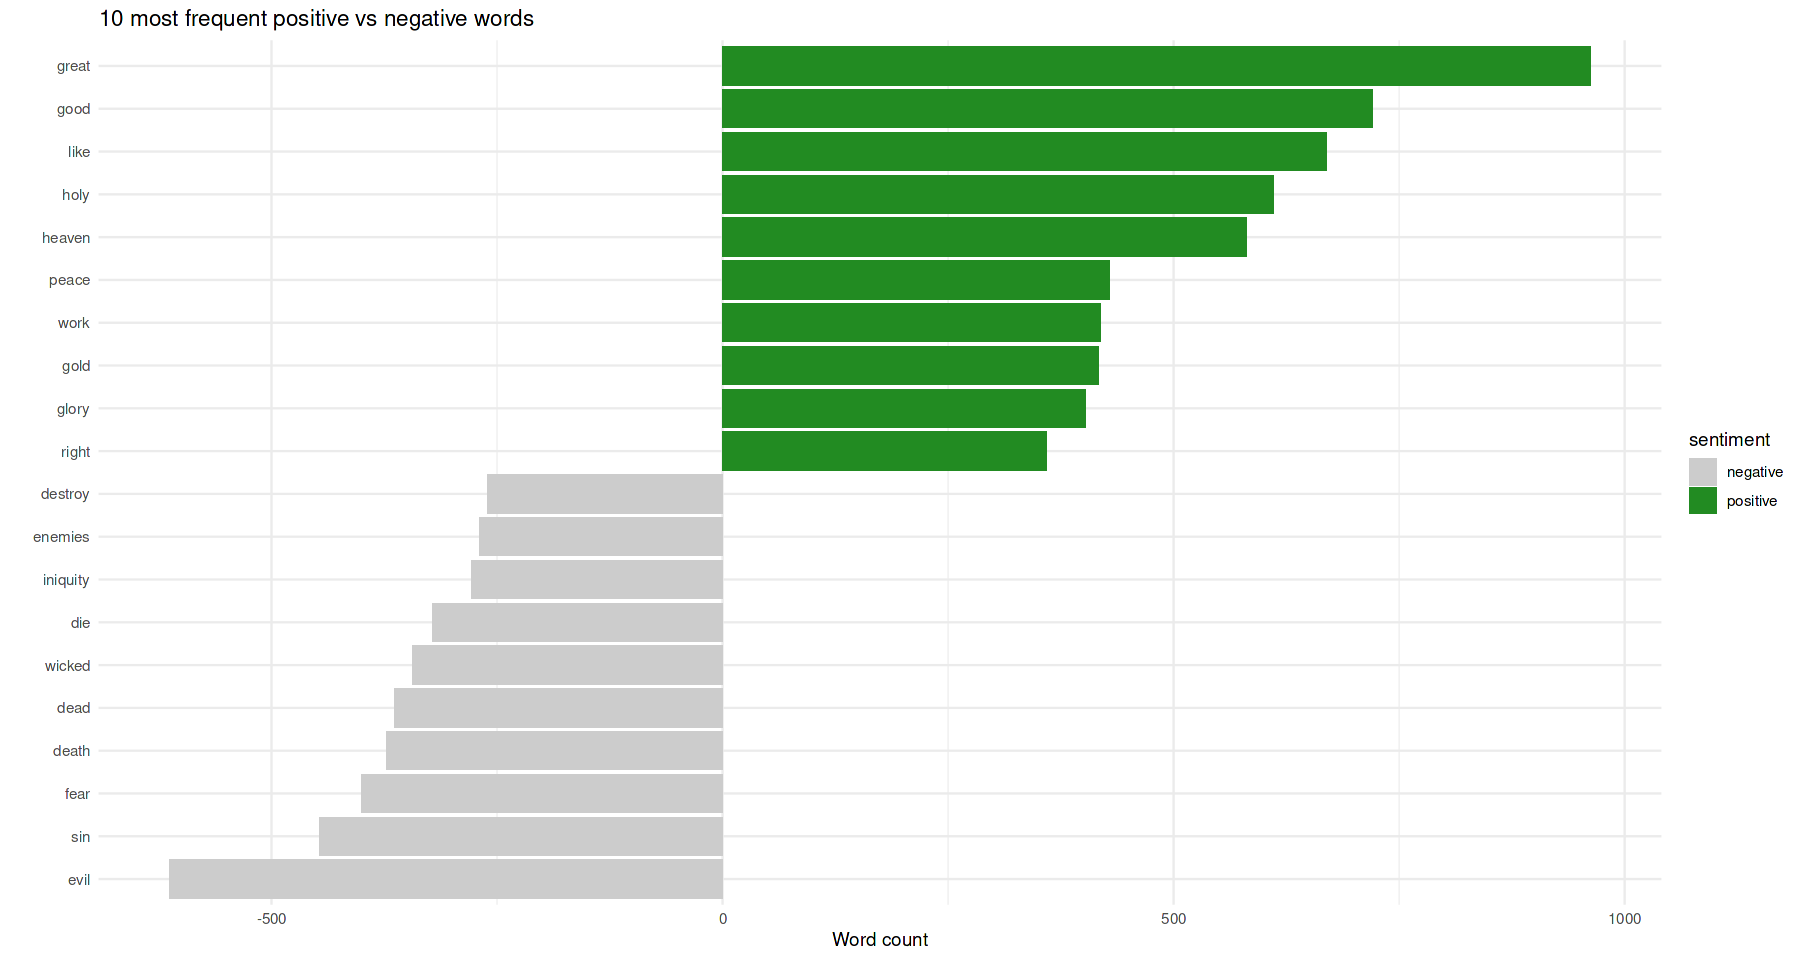

In [30]:
tidy_book_bible <- as_tibble(body_the_king_james_bible[-title_indices]) %>%
  mutate(linenumber = row_number()) %>%
  ungroup()%>%
  unnest_tokens(word, value) %>%
  count(word, sort = TRUE) %>%
  inner_join(get_sentiments("bing"))

tidy_book_bible %>% 
  acast(word ~ sentiment, value.var = "n", fill =0) %>%
  comparison.cloud(colors = c("grey80", "forestgreen"),
                   max.words = 500)

options(repr.plot.width=15, repr.plot.height=8)
tidy_book_bible %>% 
  group_by(sentiment) %>%
  slice_max(n, n = 10) %>%
  ungroup() %>% mutate(n = ifelse(sentiment == "negative", -1 * n, n)) %>%
  ggplot(aes(reorder(word,n), y = n, fill=sentiment))+geom_bar(stat="identity")+ coord_flip()+
  scale_fill_manual(values=c(positive="forestgreen", negative="grey80")) +
  ylab("Word count")+
  xlab("")+
  labs(title="10 most frequent positive vs negative words")+theme_minimal()

<div style="color:grey; font-family:Times New Roman; letter-spacing:1.5px">
    <h2 id="heading">Sentiment analysis by books in The Bible</h2>
    In the following section, we will calculate the score of each book in The Bible, and try to identify the overall positive and overall negative books. The results will be plotted as a bar chart, showing the so-called net sentiment score. The net sentiment score will be calculated for each book by deducting the number of negative words from the number of positive words. The method was taken from <a href="https://books.google.de/books?hl=en&lr=&id=qNcnDwAAQBAJ&oi=fnd&pg=PP1&dq=text+mining+with+R+&ots=Q2vRboJYv1&sig=hXMd8sUs4LzU8baFBINGLh-qP3k&redir_esc=y#v=onepage&q=text%20mining%20with%20R&f=false">Text mining with R: A tidy approach</a>.

Given the varying lengths of each book, we adjust the net sentiment calculation by considering the frequencies of each sentiment word relative to the length of the respective text, rather than solely relying on word counts. This approach accounts for differences in text lengths and provides a more accurate representation of sentiment intensity within each book.

In [25]:
sentiment_results <- list()
books_new<-books[-40]

suppressMessages(    
for(i in 1:length(books_new)) {
    sentiment_results[[i]] <- as_tibble(books_new[[i]]) %>%
  mutate(linenumber = row_number()) %>%
  ungroup()%>%
  unnest_tokens(word, value) %>%
  count(word, sort = TRUE) %>%
    mutate(freq= n / length((books_new[[i]]))) %>%
  inner_join(get_sentiments("bing")) %>% 
    group_by (sentiment)%>% 
    summarize(n=sum(freq))%>% 
pivot_wider(names_from = sentiment, values_from = n, values_fill = 0) %>% 
  mutate(sentiment = positive - negative)

})

results<-c()
for (i in 1:length(sentiment_results)){
results[i]<-(sentiment_results[[i]]$sentiment)
    }

maximum<-which.max(results)
minimum<-which.min(results)

new_titles<-body_the_king_james_bible[title_indices[-40]]
# Print the titles of most positive and most negative book according to net sentiment score. 
cat(new_titles[c(maximum,minimum)], sep = "\n")

The Song of Solomon
Zephaniah


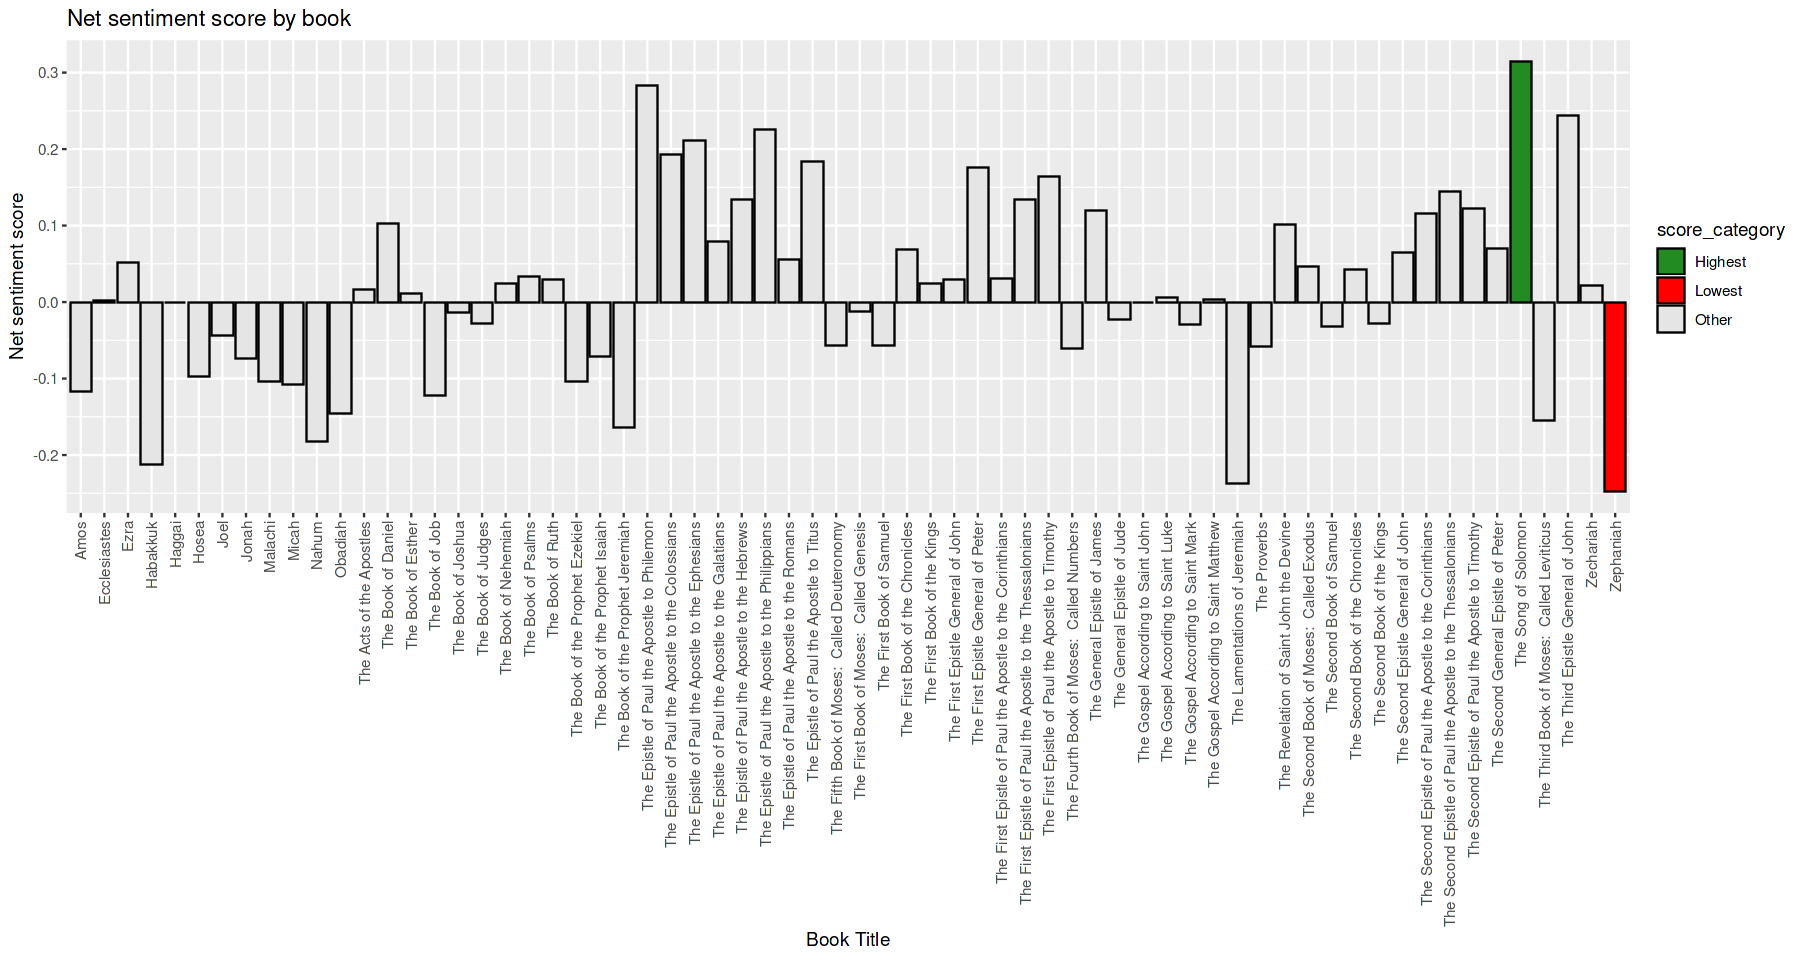

In [34]:
options(repr.plot.width=15, repr.plot.height=8)
my_data<-data.frame(title=new_titles, sentiment_score=results)

# Find the maximum and minimum sentiment scores
max_score <- max(my_data$sentiment_score)
min_score <- min(my_data$sentiment_score)

# Create a new variable to indicate whether each score is the highest, lowest, or neither
my_data$score_category <- ifelse(my_data$sentiment_score == max_score, "Highest",
                                 ifelse(my_data$sentiment_score == min_score, "Lowest", "Other"))

# Define colors for each category
colors <- c("Highest" = "forestgreen", "Lowest" = "red", "Other" = "grey90")

# Plot the bar chart with different colors for each category
ggplot(my_data, aes(x = title, y = sentiment_score, fill = score_category)) +
  geom_bar(stat = "identity", color = "black") +
  scale_fill_manual(values = colors) +  # Use manual scale for fill colors
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
  labs(x = "Book Title", y = "Net sentiment score", title = "Net sentiment score by book")


<div style="color:grey; font-family:Times New Roman; letter-spacing:1.5px">
    From the above chart, we can see that the overall intensity of positive words is the highest in The song of Solomon book, and the lowest in the book Zephaniah.
    

<div style="color:grey; font-family:Times New Roman; letter-spacing:1.5px">
    <h2 id="heading">Conclusion</h2>
    In conclusion, through the application of text mining techniques, we have gained some insights into the books: The King James Bible and Meditations, by Marcus Aurelius.

Firstly, we segmented the Bible into its separate books. By visualizing word clouds, we highlighted the most common words in both the Bible and Meditations, shedding light on the thematic focal points of each text. Additionally, bar charts showcased the top 20 most common words, offering further context.

Moreover, sentiment analysis provided a deeper understanding of the emotional tone within these works. By generating word clouds of positive and negative sentiment words, we presented the negative and positive undertones. Notably, we identified the most common positive and negative words in each text.

Furthermore, by calculating the net sentiment scores for each book in the Bible and plotting them on a bar chart, we observed varying degrees of emotional intensity across different biblical texts. Notably, the Song of Solomon exhibited the highest sentiment intensity, suggesting themes of love and passion, while the Book of Zephaniah demonstrated the lowest.

Text mining can do more than what we've seen. We can use it to compare texts using tools like log odds ratios, which help us see differences more clearly. By looking at things like word patterns and styles, we can learn even more about authors and their work. Also, we can combine text mining with other info, like social media or history, to get a bigger picture. Text mining isn't just for experts—it's a useful tool for anyone curious about language and stories
   

<div style="color:grey; font-family:Times New Roman; letter-spacing:1.5px">
    <h2 id="heading">Reference</h2>
    Silge, J., & Robinson, D. (2017). Text mining with R: A tidy approach. " O'Reilly Media, Inc.".
<div style="color:grey; font-family:Times New Roman; letter-spacing:1.5px">    
    J. Preda. "Exploring King James Bible Books" Kaggle,https://www.kaggle.com/code/gpreda/explore-king-james-bible-books, Accessed April 12, 2024.

   
    